# Predicting Electric Vehicle Base MSRP Using Supervised Regression

**Name**: Stephy Mariam Mathew

**Organization**: Entri Elevate

**Date**: 09-06-2025


## Introduction

The global push for sustainable transportation has accelerated the adoption of electric vehicles (EVs), prompting governments and industries to rethink mobility. As EV adoption rises, understanding the pricing of these vehicles becomes increasingly crucial. EV prices are influenced by a range of variables, including vehicle specifications, location, and policy incentives.

This project leverages a comprehensive dataset of EV registrations in Washington State to develop a machine learning regression model. The goal is to predict the Base MSRP (Manufacturer’s Suggested Retail Price) of EVs based on their characteristics. The insights gained can aid:

* EV Manufacturers in pricing strategy

* Policy Makers in designing subsidy/incentive programs

* Consumers and Analysts in market understanding

## Problem Statement
To build a supervised machine learning regression model that accurately predicts the Base MSRP of electric vehicles based on available features. The model will uncover patterns and factors that most significantly influence EV pricing.

## Data Description
Source: U.S. Government Open Data

Dataset : https://catalog.data.gov/dataset/electric-vehicle-population-data

Type: Supervised Learning - Regression

Target Variable: Base MSRP

Rows: 232,230

Features: 17

| Feature Name                             | Description                                                    |
| ---------------------------------------- | -------------------------------------------------------------- |
| `VIN (1-10)`                             | Unique Vehicle Identification Number (masked)                  |
| `County`, `City`, `State`, `Postal Code` | Geographic details of vehicle registration                     |
| `Model Year`                             | Year the vehicle was manufactured                              |
| `Make`                                   | Manufacturer of the vehicle                                    |
| `Model`                                  | Specific model of the vehicle                                  |
| `Electric Vehicle Type`                  | Type of EV (e.g., Battery Electric, Plug-in Hybrid)            |
| `CAFV Eligibility`                       | Clean Alternative Fuel Vehicle program eligibility             |
| `Electric Range`                         | Estimated range of the vehicle on electric power (in miles)    |
| `Base MSRP`                              | **Target variable** - Manufacturer’s Suggested Retail Price |
| `Legislative District`                   | District of registration                                       |
| `DOL Vehicle ID`                         | ID assigned by Department of Licensing                         |
| `Vehicle Location`                       | Latitude and longitude of the vehicle                          |
| `Electric Utility`                       | Utility company serving that location                          |
| `2020 Census Tract`                      | Census tract info for demographic linking                      |


# Exploratory Data Analysis (EDA)

 # Data Cleaning & Preprocessing 

In [1]:
# to deactivate warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
# Load Dataset
path = r"C:\Users\aksha\Downloads\Electric_Vehicle_Population_Data (1).csv"
df = pd.read_csv(path)

In [4]:
# to print the first 5 rows of the dataset
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,101250425,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGAEE5M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,224162858,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
3,5YJ3E1EBXN,King,Bellevue,WA,98004.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,219428079,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,JM3KKEHA8S,Thurston,Yelm,WA,98597.0,2025,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,2.0,277791643,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
# to print the last 5 rows of the dataset
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
246132,WVGTMPE29M,Thurston,Olympia,WA,98513.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,209653335,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
246133,7G2CEHED7R,King,Redmond,WA,98053.0,2024,TESLA,CYBERTRUCK,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,277261365,POINT (-122.03287 47.68555),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
246134,1G1RC6S54H,Benton,Kennewick,WA,99337.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,8.0,132573318,POINT (-119.14482 46.18764),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10
246135,KNDPZDDH0R,Snohomish,Edmonds,WA,98026.0,2024,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,21.0,261327433,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10
246136,1N4BZ1DV6M,Pierce,Lakewood,WA,98498.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,28.0,258115413,POINT (-122.54764 47.17669),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10


In [6]:
print("Shape of the dataset is: ")
df.shape

Shape of the dataset is: 


(246137, 17)

In [7]:
print("Columns: ")
df.columns

Columns: 


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
print("Dataset Information:")
print("\t")
df.info()

Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type                              

In [9]:
# to print the summary statistics
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,246133.000000,246137.000000,246120.000000,246120.000000,245597.000000,2.461370e+05,2.461330e+05
mean,98179.658481,2021.535698,44.872192,746.606188,28.871831,2.374324e+08,5.297685e+10
std,2494.101983,2.999144,82.913952,6987.233456,14.895938,6.719158e+07,1.580103e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.083391e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.548460e+08,5.303303e+10
75%,98375.000000,2024.000000,37.000000,0.000000,42.000000,2.717319e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [10]:
#Finding missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print("\t")
print(missing_values)

Missing Values:
	
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        17
Base MSRP                                             17
Legislative District                                 540
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64


In [11]:
# filling null values of numeric features

num_col = df.select_dtypes(include=['number']).columns 
df[num_col] = df[num_col].fillna(df[num_col].mean())     # this method calculates the mean value of each numeric columns and fill null values with that mean. 

In [12]:
# filling null values of non-numeric features

non_num_col = df.select_dtypes(include=['object']).columns
df[non_num_col] = df[non_num_col].fillna("Missing")      # this method fills null values in the selected columns with the string "Missing".

In [13]:
missing_values = df.isnull().sum()
print("Missing Values after imputation:")
print("\t")
print(missing_values)

Missing Values after imputation:
	
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [15]:
#Checking for duplicates
print(f"Total number of duplicated values is : {df.duplicated().sum()}")


Total number of duplicated values is : 0


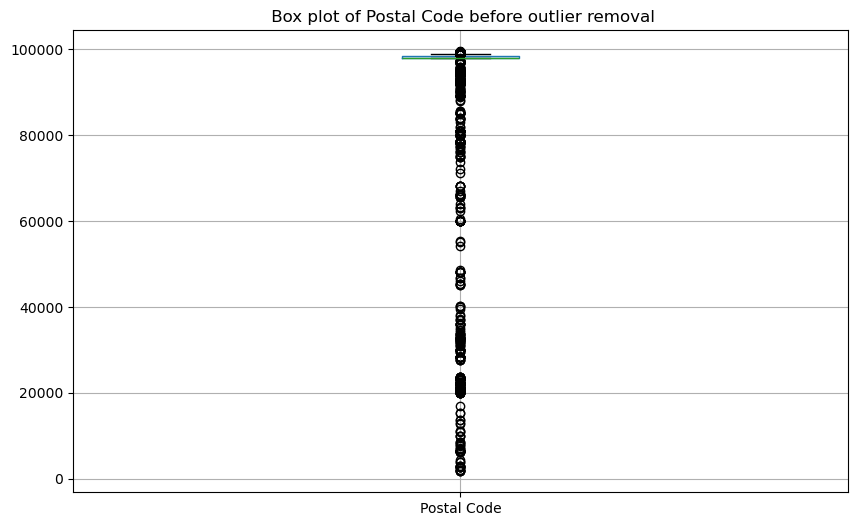

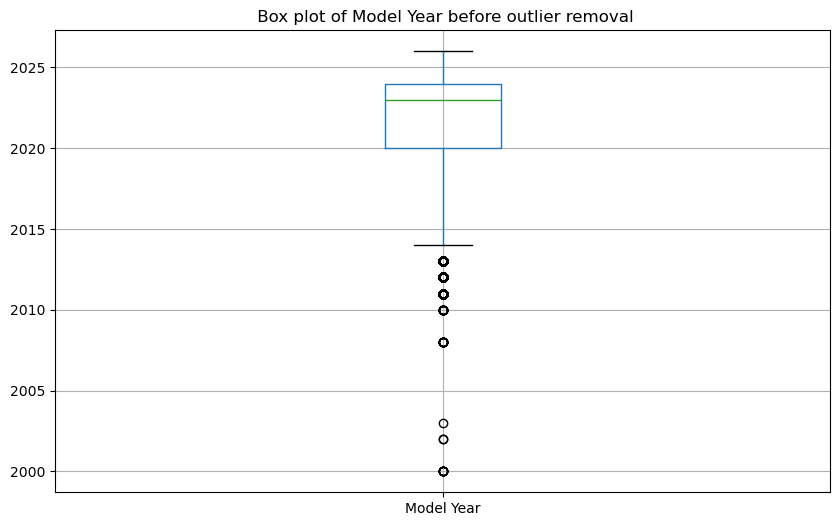

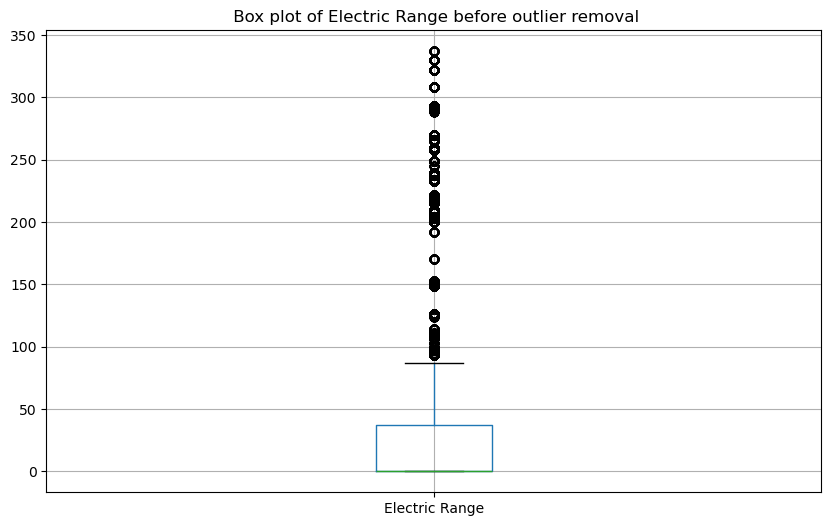

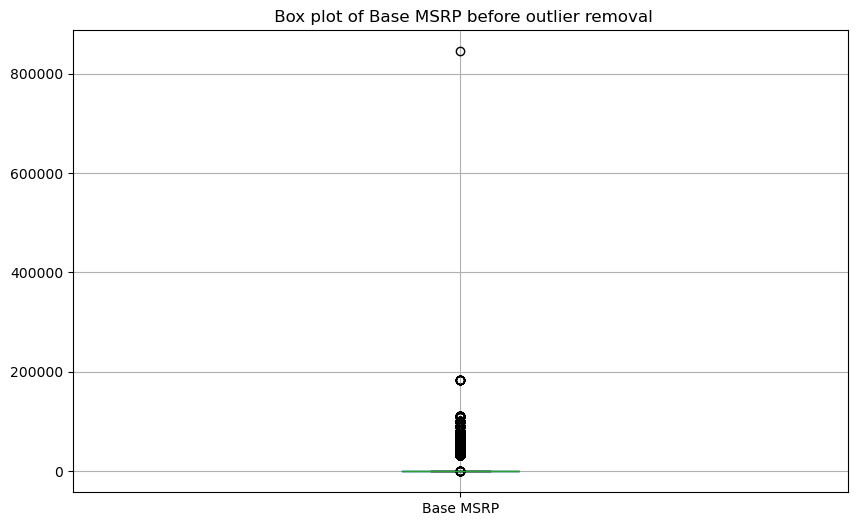

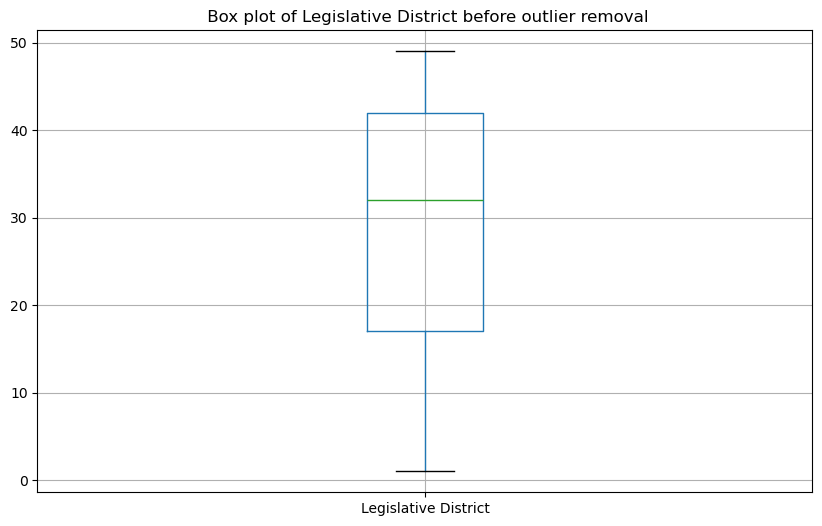

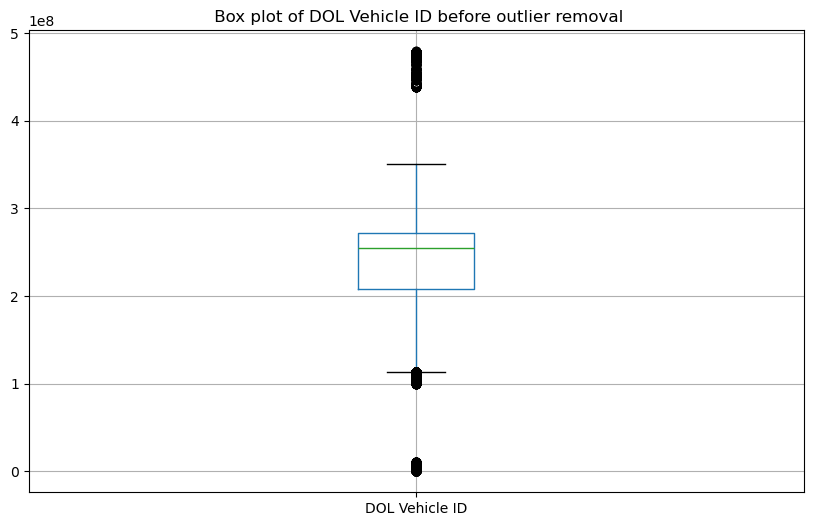

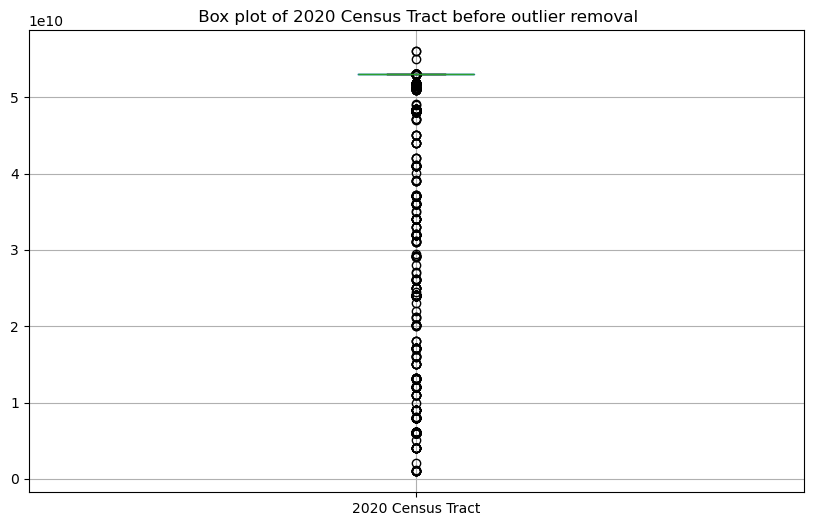

In [14]:
# Visualizing Outliers before outlier removal

num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} before outlier removal")
    plt.show()

             The dataset contains significant outliers in certain features, which may skew the model's performance and lead to biased predictions. To ensure robust and accurate modeling, applying IQR method

In [16]:
# Outlier removal using IQR Method

def handle_outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5* IQR
        upper = Q3 + 1.5* IQR
        df[col] = df[col].clip(lower,upper)
    return df

In [17]:
columns = df.select_dtypes(include=['number']).columns
columns = columns.drop('Base MSRP')
columns
df = handle_outlier(df,columns)

# this approach helps prevent data loss in the column 'Base MSRP'

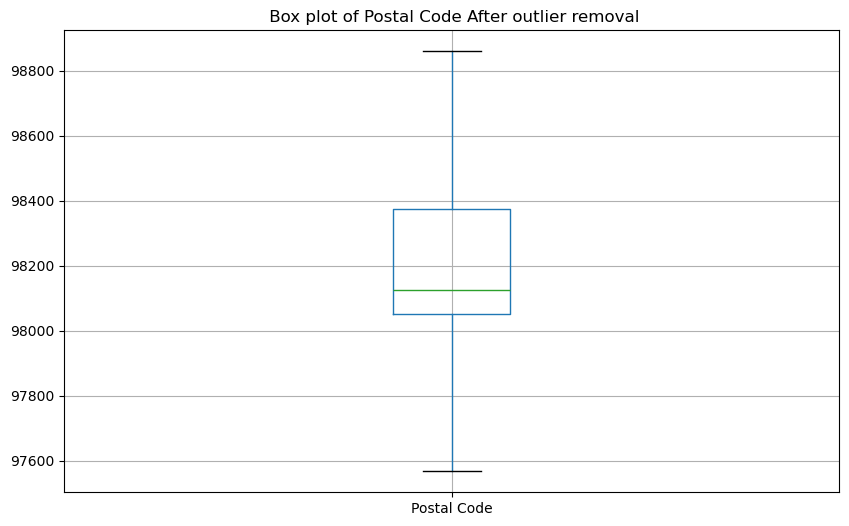

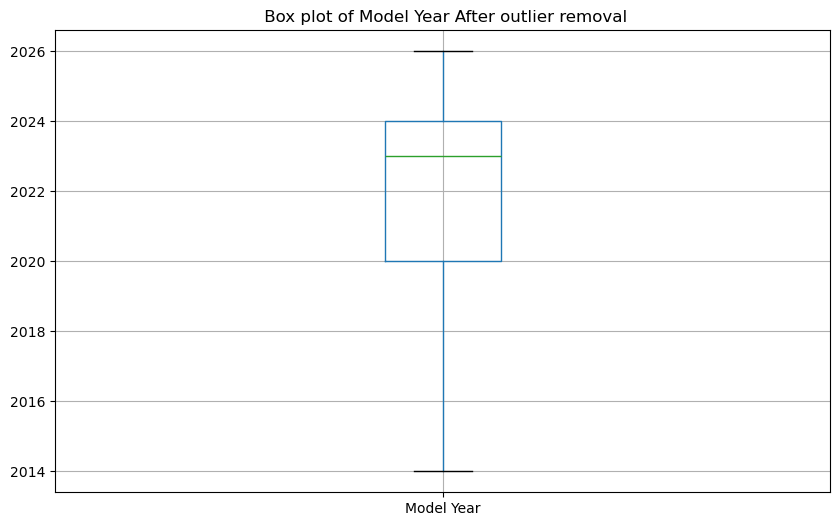

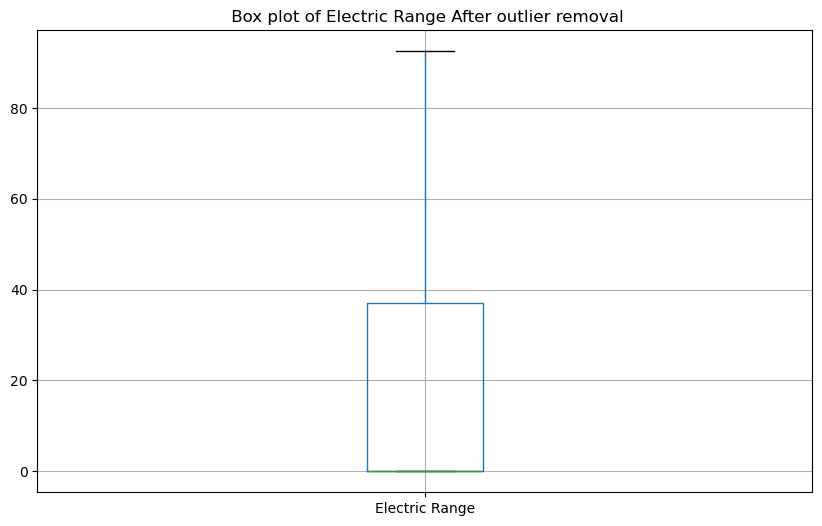

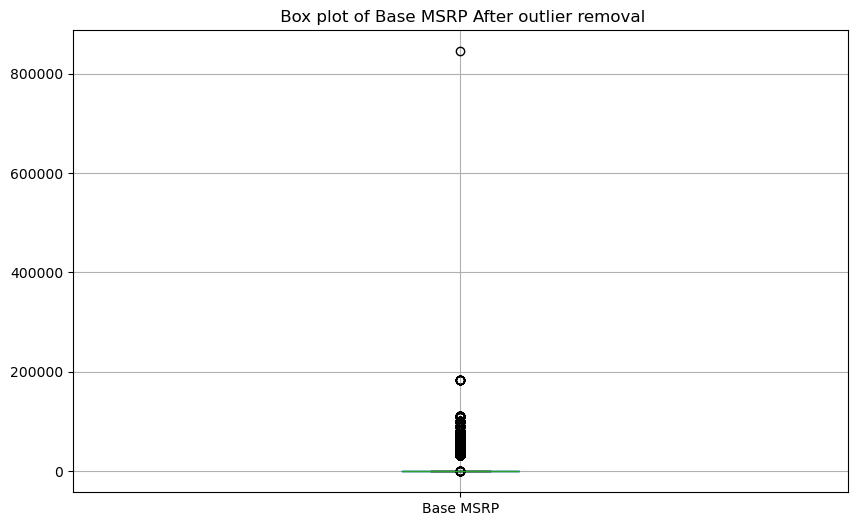

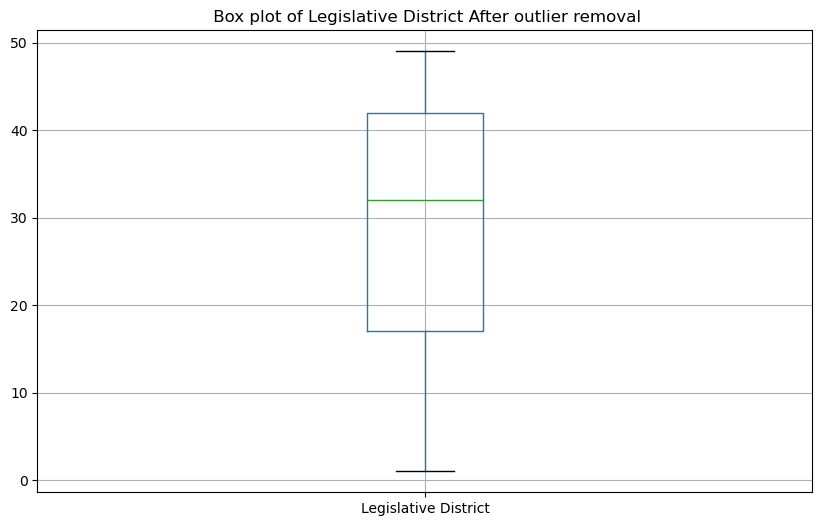

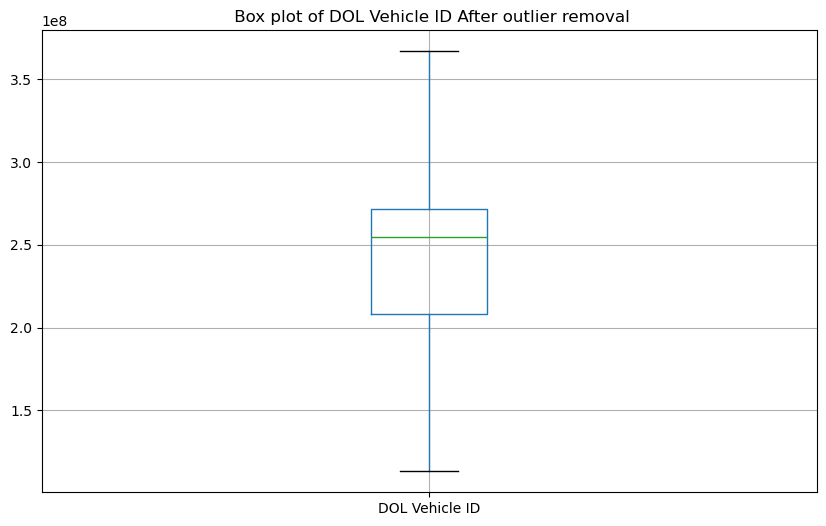

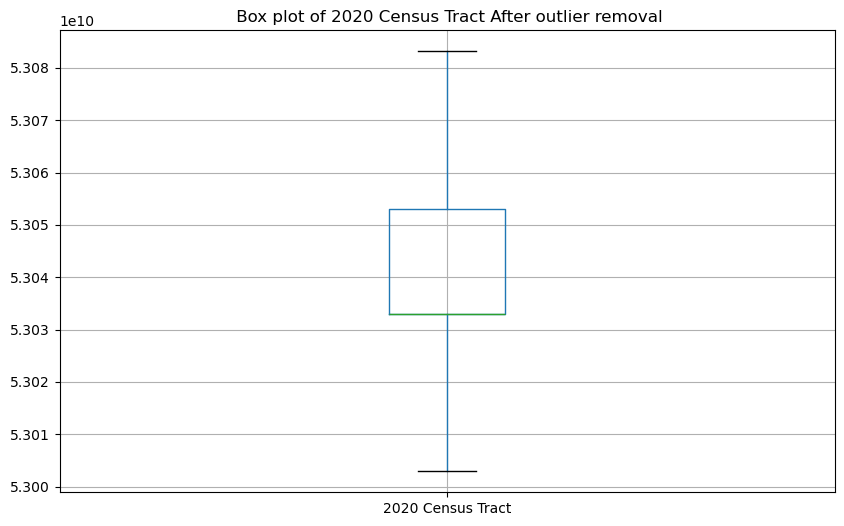

In [18]:
num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} After outlier removal")
    plt.show()

In [19]:
# Checking skewness
skewness = df.select_dtypes(include=['number']).skew()
skewness

Postal Code              1.076459
Model Year              -1.105118
Electric Range           1.159114
Base MSRP               16.320237
Legislative District    -0.430293
DOL Vehicle ID          -0.546363
2020 Census Tract        0.217403
dtype: float64

In [20]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print("Skewed Features are :\n", skewness[skewed_feature])

Skewed Features are :
 Postal Code        1.076459
Model Year        -1.105118
Electric Range     1.159114
Base MSRP         16.320237
DOL Vehicle ID    -0.546363
dtype: float64


In [21]:
df['Base MSRP'] = np.log1p(df['Base MSRP'])
skewness = df.select_dtypes(include=['number']).skew()
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.076459
Model Year       -1.105118
Electric Range    1.159114
Base MSRP         8.548155
DOL Vehicle ID   -0.546363
dtype: float64


In [22]:
df['Model Year'] = df['Model Year'].max() - df['Model Year'] + 1
df['Model Year'] = np.log1p(df['Model Year'])

In [23]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.076459
Model Year       -1.105118
Electric Range    1.159114
Base MSRP         8.548155
DOL Vehicle ID   -0.546363
dtype: float64


In [24]:
from sklearn.preprocessing import PowerTransformer

# Applying PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[skewed_feature] = pt.fit_transform(df[skewed_feature])

In [25]:
print("Skewness after applying yeo-johnson: \n", df.select_dtypes(include=['number']).skew())

Skewness after applying yeo-johnson: 
 Postal Code             0.000000
Model Year              0.008380
Electric Range          0.440233
Base MSRP               8.527921
Legislative District   -0.430293
DOL Vehicle ID          0.000904
2020 Census Tract       0.217403
dtype: float64


In [26]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,King,Seattle,WA,-4.440892e-16,1.041611,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.371466,-0.115693,37.0,-2.016680,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGAEE5M,Yakima,Selah,WA,3.774758e-15,0.507282,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,-0.812650,-0.115693,15.0,-0.325489,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,WA,3.774758e-15,0.148730,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,-0.812650,-0.115693,15.0,-0.973339,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
3,5YJ3E1EBXN,King,Bellevue,WA,-1.554312e-15,0.148730,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,-0.812650,-0.115693,41.0,-0.413142,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,JM3KKEHA8S,Thurston,Yelm,WA,2.220446e-15,-1.863018,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,1.057747,-0.115693,2.0,0.755937,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


In [27]:
# Splitting the Dataset into Features and Target

X_train = df.drop(['VIN (1-10)', 'Base MSRP'], axis=1)
y_train = df['Base MSRP']
# Here the column 'VIN (1-10)' is a ID Column (Unique identifier) and in machine learning, these columuns are often not used directly in modeling, as they don't provide meaningful information about the realtionships between variables. 

In [28]:
#Label encoding
#label encoding assigns integers to categories without increasing dimensions.

cat_col = X_train.select_dtypes(include = ['object'])
le = LabelEncoder()
for col in cat_col.columns:
    X_train[col] = le.fit_transform(X_train[col])

In [29]:
numeric_data = df.select_dtypes(include=['float64','int64'])

In [30]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,0.037487,0.067075,-0.001317,-0.395555,0.005666,0.034553
Model Year,0.037487,1.000000,0.595444,0.176408,0.010631,-0.377408,0.005687
Electric Range,0.067075,0.595444,1.000000,0.138528,-0.019071,-0.143857,-0.005613
Base MSRP,-0.001317,0.176408,0.138528,1.000000,0.008505,-0.044817,0.001179
Legislative District,-0.395555,0.010631,-0.019071,0.008505,1.000000,-0.007737,-0.099813
DOL Vehicle ID,0.005666,-0.377408,-0.143857,-0.044817,-0.007737,1.000000,-0.004498
2020 Census Tract,0.034553,0.005687,-0.005613,0.001179,-0.099813,-0.004498,1.000000


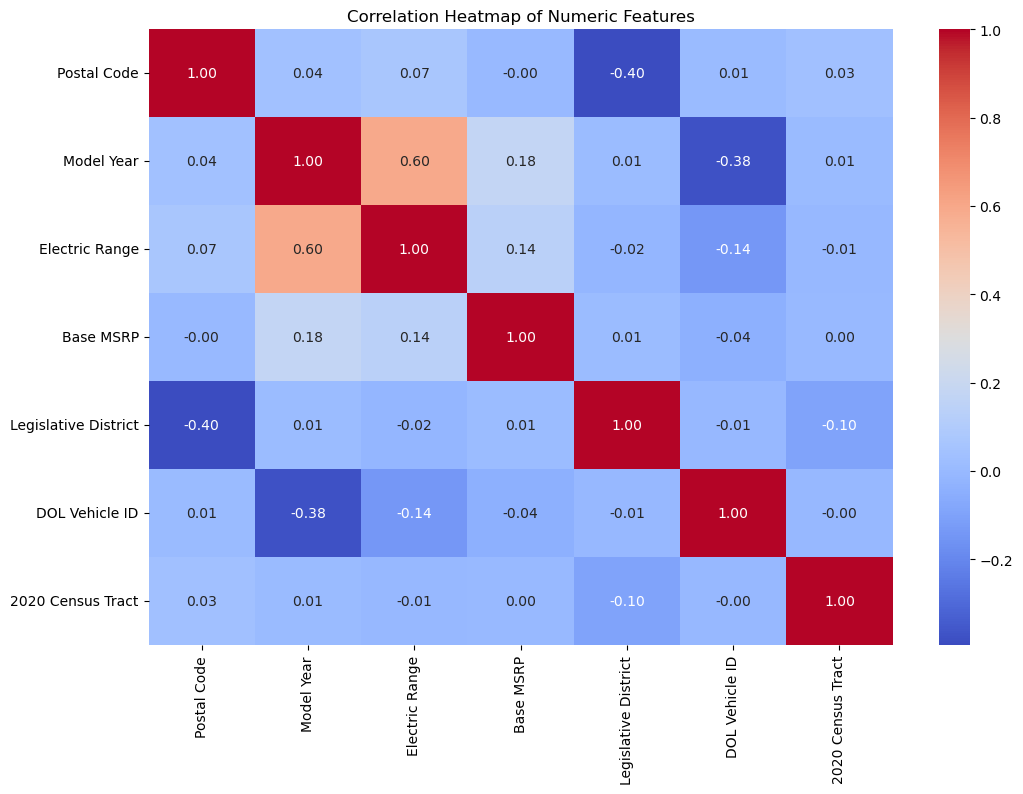

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Text(0.5, 1.0, 'Kernel Density Estimation of Features ')

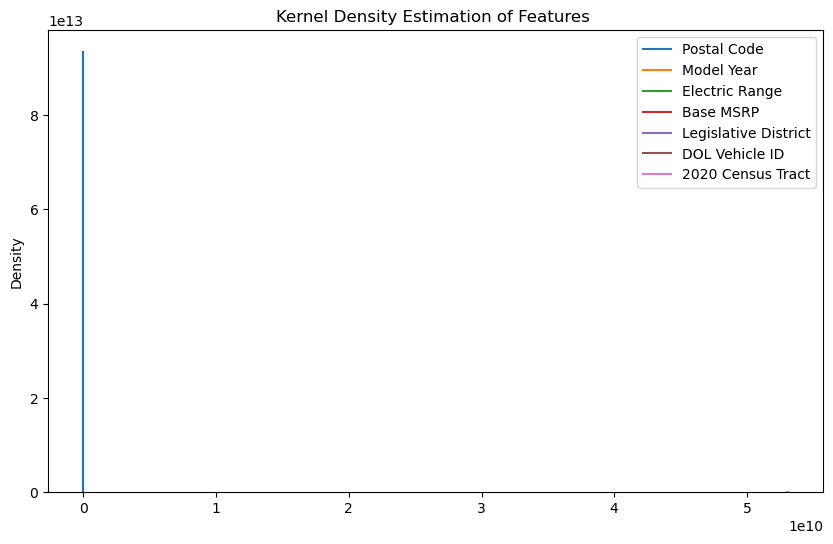

In [32]:
# Kernel Density Estimation Plot of all features
plt.figure(figsize=(10,6))
sns.kdeplot(df)
plt.title('Kernel Density Estimation of Features ')

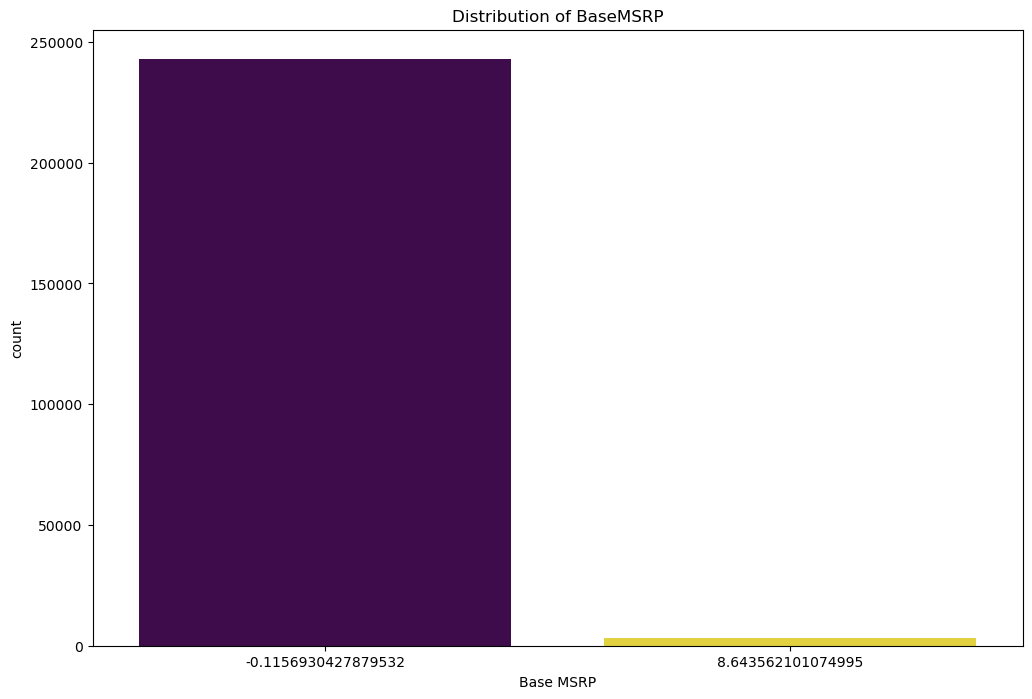

In [33]:
# Count Plot of Base MSRP
plt.figure(figsize=(12,8))
sns.countplot(x ='Base MSRP', data=df,  hue='Base MSRP', legend=False, palette='viridis')
plt.title("Distribution of BaseMSRP")
plt.show()

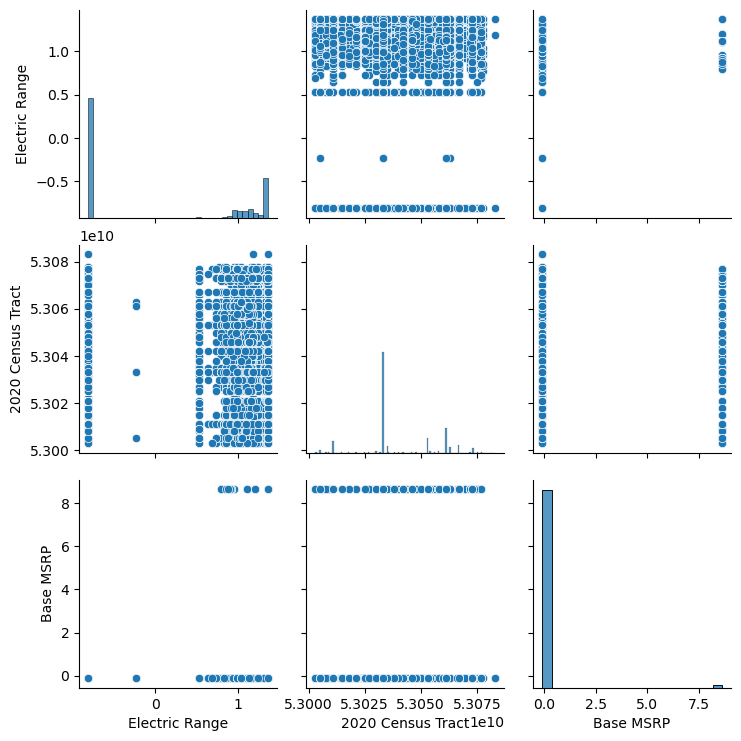

In [34]:
# Pair plot for selected features
sns.pairplot(df[['Electric Range', '2020 Census Tract', 'Base MSRP']])
plt.show()

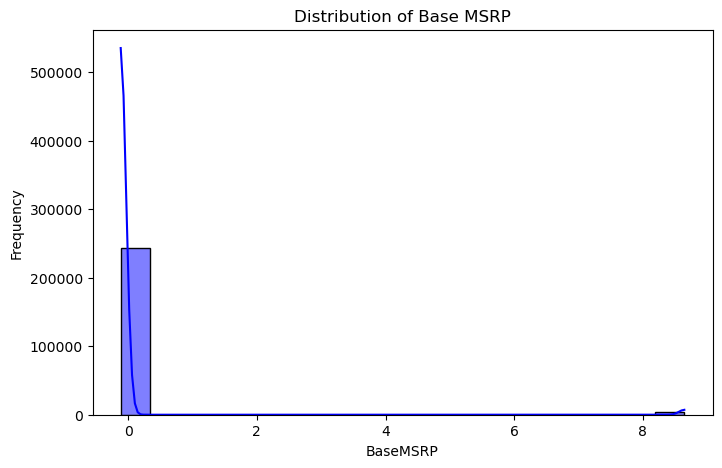

In [35]:
# Distribution of the Target Variable 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.histplot(df['Base MSRP'], kde=True, color='blue')
plt.title("Distribution of Base MSRP")
plt.xlabel("BaseMSRP")
plt.ylabel("Frequency")
plt.show()

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
# Feature selection
selector = SelectKBest(score_func = f_regression, k=10)
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
feature = X_train.columns
score = selector.scores_

feature_score = pd.DataFrame({
    'Feature' : feature,
    'Score' : score
}).sort_values(by = 'Score' , ascending = False)
selected_feature = selected_features.to_list()
print("Feature scores")
feature_score

Feature scores


,Feature,Score
4,Model Year,7905.720310
9,Electric Range,4815.712265
7,Electric Vehicle Type,597.711448
11,DOL Vehicle ID,495.362521
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,160.691534
10,Legislative District,17.805864
1,City,4.940296
6,Model,3.884672
12,Vehicle Location,1.361810
2,State,1.008418


In [37]:
print("Selected Features")
selected_feature

Selected Features


['City',
 'State',
 'Model Year',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location']

# Model Evaluation

In [38]:
#Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Feature selection and scaling
X_train = X_train[selected_feature]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [40]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

In [41]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor()
}

In [42]:
# Train, predict, and evaluate
result = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    result[model_name] = {
        "R2 Score": r2,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }


In [44]:
# Convert results to DataFrame and display
result = pd.DataFrame(result).T
result = result.sort_values(by='R2 Score', ascending=False)
print("\n Model Evaluation Results:\n")
print(result)


 Model Evaluation Results:

                                R2 Score       MSE       MAE      RMSE
3. Random Forest Regressor      0.988897  0.011066  0.002651  0.105193
2. Decision Tree Regressor      0.985535  0.014417  0.001690  0.120069
4. Gradient Boosting Regressor  0.937994  0.061798  0.037533  0.248593
6. MLP Regressor                0.880638  0.118962  0.114442  0.344909
5. Support Vector Regressor     0.082549  0.914377  0.156687  0.956231
1. Linear Regression            0.037905  0.958871  0.268226  0.979220


In [45]:
#Find the best model
best_model = result['R2 Score'].idxmax()
print("\n Best Model Based on R2 Score:")
print(f"{best_model}")
print(result.loc[best_model])



 Best Model Based on R2 Score:
3. Random Forest Regressor
R2 Score    0.988897
MSE         0.011066
MAE         0.002651
RMSE        0.105193
Name: 3. Random Forest Regressor, dtype: float64


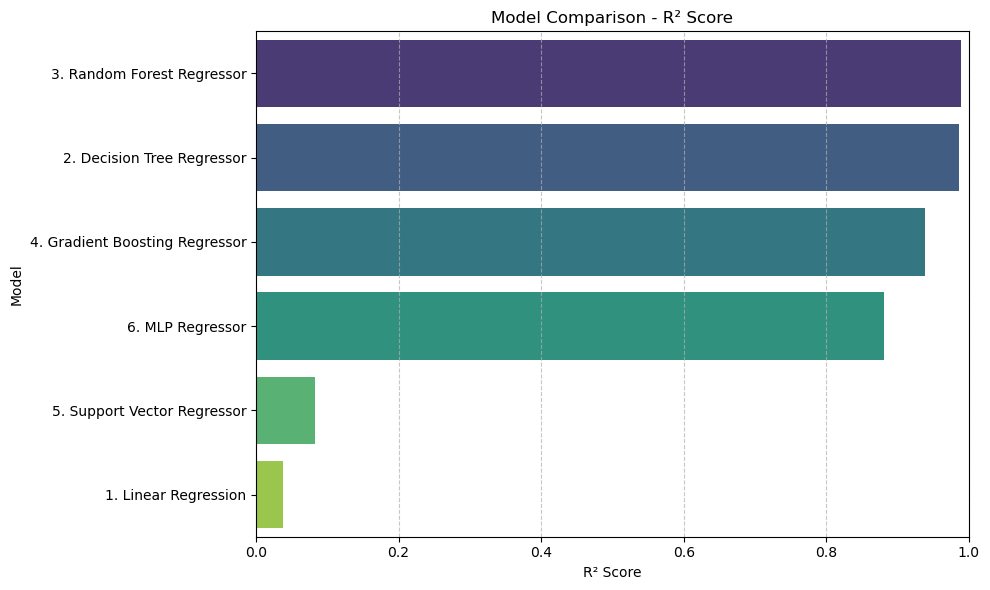

In [46]:
#  Visualize the R² Score for all models
plt.figure(figsize=(10, 6))
sns.barplot(x=result['R2 Score'], y=result.index, palette='viridis')
plt.title('Model Comparison - R² Score')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Findings:

The best-performing model based on the R2 Score is the Random Forest Regressor with

R2 Score    0.989120

MSE         0.010843

MAE         0.002589

RMSE        0.104131

# Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing a model's performance by selecting the best combination of hyperparameters. 
These parameters are not learned from the data but are set prior to the training process. 
In this case, we used GridSearchCV to systematically search through a predefined hyperparameter grid for the Random Forest Regressor.

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [48]:
print(X_train.shape)
print(y_train.shape)


(196909, 10)
(196909,)


In [49]:
#Initialize the Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)


In [50]:
#Fit the Grid Search to the data & get the best parameters and score
try:
    grid_search.fit(X_train, y_train)
    best_param = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters: {best_param}")
    print(f"Best Cross-Validation MSE Score: {-best_score}")
except Exception as e:
    print("An error occurred:", e)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation MSE Score: 0.02605341797636581


In [54]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
# Final Model Training
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the results
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Test MSE: 0.0196972078904016
Test MAE: 0.0196972078904016
Test R2: 0.9802365762554391
Test RMSE: 0.14034674164511837


# Pipeline Creation

In [62]:
# Splitting features and target
X = df.drop(['Base MSRP'], axis=1)
y = df['Base MSRP']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [64]:
# Identifying numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [66]:
# Creating the Full Pipeline¶
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', grid_search.best_estimator_)  # Best model from hyperparameter tuning
])


In [67]:
# Fitting the Pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Postal Code', 'Model Year', 'Electric Range', 'Legislative District',
       'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       n_estimators=200, random_state=42))])

In [61]:
# Saving the Pipeline
import joblib
joblib.dump(pipeline, 'random_forest_pipeline.joblib')


['random_forest_pipeline.joblib']

# Conclusion
- This project aimed to predict the Base MSRP (Manufacturer’s Suggested Retail Price) of electric vehicles using a structured machine learning approach. 

- Through careful data preprocessing, feature engineering, model evaluation, and hyperparameter tuning, the Random Forest Regressor emerged as the best-performing model, achieving an R² score of 0.989120.

- The creation of a full scikit-learn pipeline enabled streamlined preprocessing and modeling, ensuring reproducibility and simplifying deployment.

- The pipeline handles missing values, scales numerical features, encodes categorical variables, and integrates the best estimator into a single, trainable object.

# Key Takeaways
- Data preprocessing (imputation, scaling, encoding) significantly impacted model performance.

- Hyperparameter tuning using GridSearchCV improved model accuracy.

- Random Forest Regressor, after tuning, performed best across multiple evaluation metrics.

- The trained pipeline was saved using joblib for reuse in real-world applications.

# Limitations
- The dataset showed signs of zero-inflation in the target variable, potentially affecting accuracy.

- High computational cost during training, especially with large datasets.

- The model may not fully capture non-linear relationships or complex interactions.

- Presence of data bias or missing contextual variables (e.g., incentive programs, market demand) may affect generalizability.

# Future Scope
- Apply explainability tools (e.g., SHAP, LIME) to understand feature influence.

- Explore ensemble methods or deep learning models for improved performance.

- Incorporate time-series and geospatial features for deeper insights.

- Investigate transfer learning or domain adaptation for new regional datasets.

- Consider real-time deployment via APIs or web apps for dynamic pricing predictions.

- Address uncertainty quantification to make predictions more reliable in business use cases.

# Impact
- Accurately predicting electric vehicle prices can:

- Support manufacturers in pricing strategy.

- Aid policymakers in assessing policy impacts.

- Empower consumers with data-driven purchase decisions.

- Promote sustainable transportation and EV adoption.



